<a href="https://colab.research.google.com/github/merasifa/MACHINE_LEARNING/blob/main/JS04_TIARA_MERA_SIFA_2341720247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K MEANS

Praktikum 1

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Seleksi Fitur

X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]

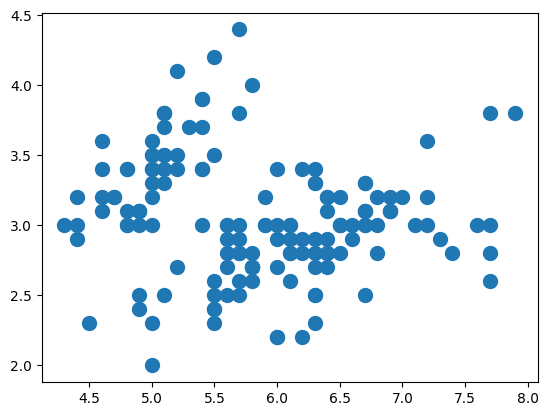

In [ ]:
# Plot Data
# Karena data 4 dimensi, maka akan kita coba
# plot cluster berdasarkan Sepal Length dan Sepal Width  saja

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [ ]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

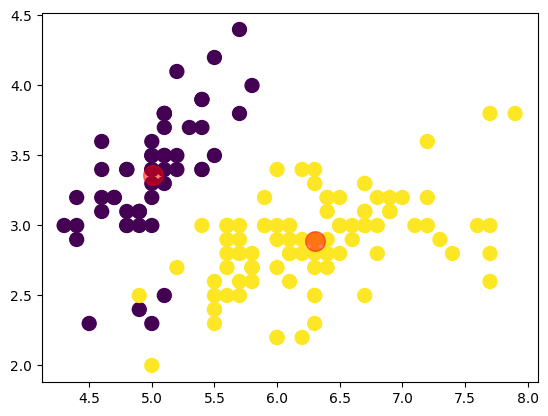

In [ ]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [ ]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 152.36870647733915


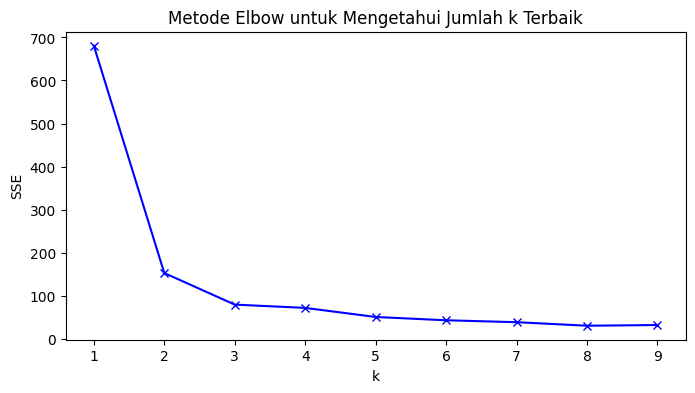

In [ ]:
# Implementasi Metode Elbow

# List nilai SSE
sse = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
 kmeanModel = KMeans(n_clusters=k)
 kmeanModel.fit(X)
 sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=680.8243999999996
k=2; SSE=152.36870647733915
k=3; SSE=78.94506582597728
k=4; SSE=71.3362224245357
k=5; SSE=50.18952210684964
k=6; SSE=42.531114185195634
k=7; SSE=38.093779870129865
k=8; SSE=29.881402210510913
k=9; SSE=31.445262070775215


PRAKTIKUM 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

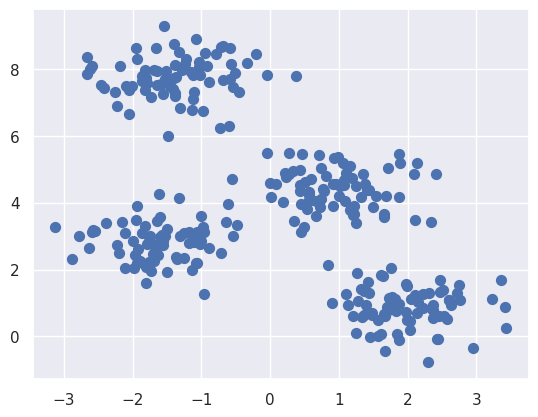

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

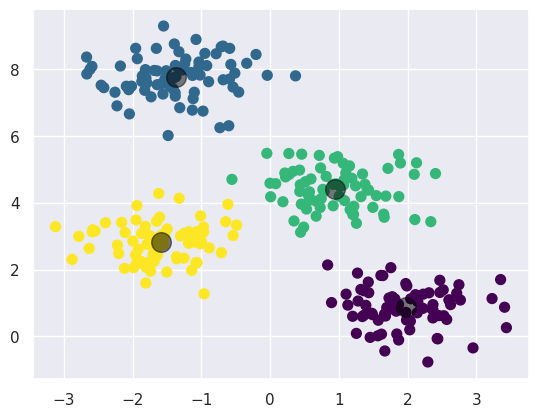

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

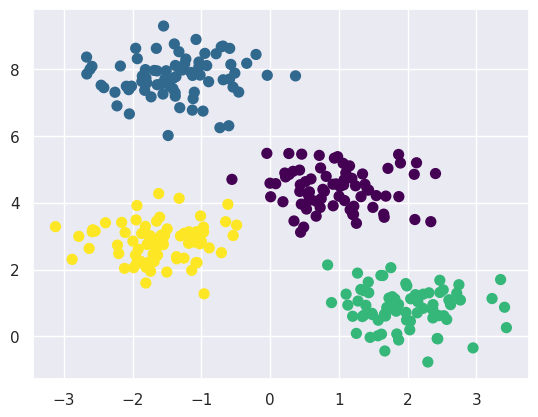

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. input label center yang baru
        labels = pairwise_distances_argmin(X, centers)

        # 2b. update center dari titik baru
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. cek konvergensi
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

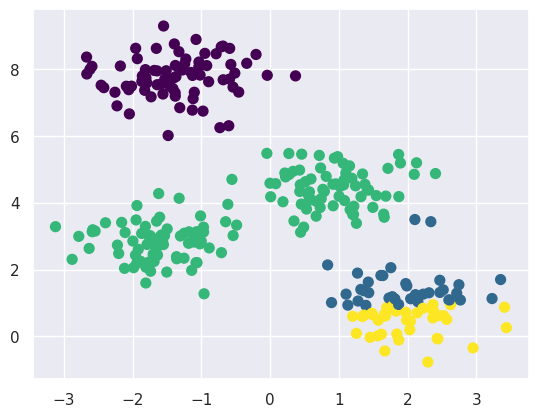

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

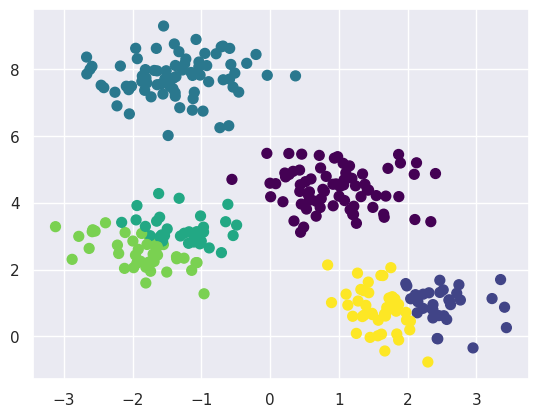

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

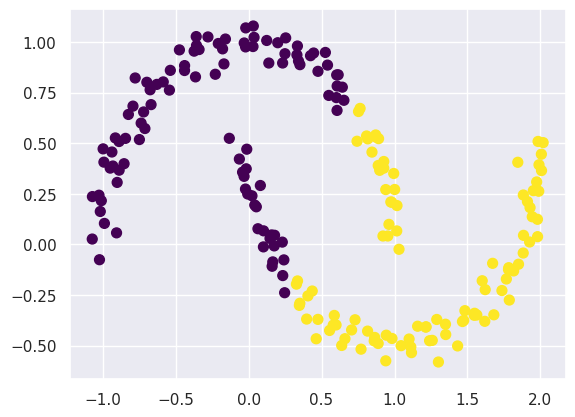

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


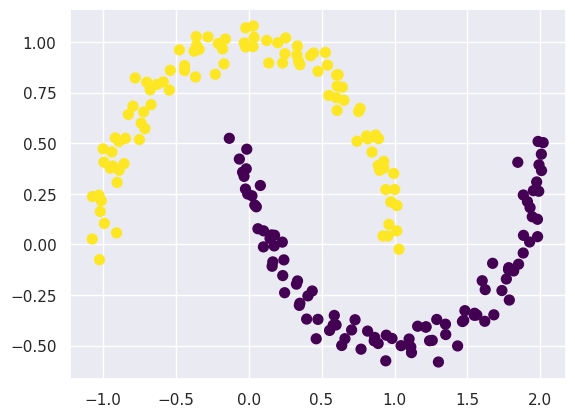

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

Contoh Kasus 1: Karakter Angka

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
# terapkan K-Means
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

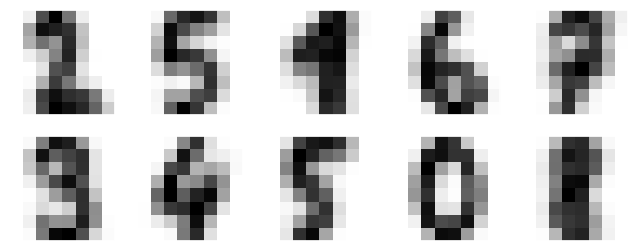

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

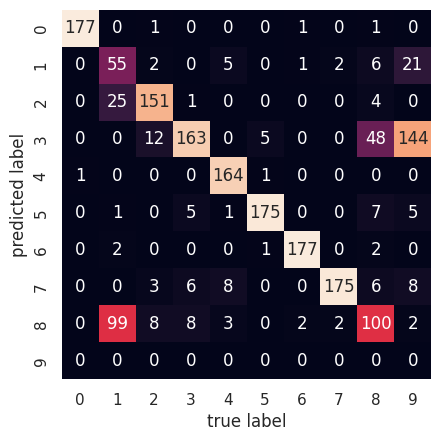

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
from sklearn.manifold import TSNE


tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# hitung klaster
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# permutasi label
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# hitung akurasi
accuracy_score(digits.target, labels)

0.9410127991096272

Studi Kasus 2: Kompresi Citra

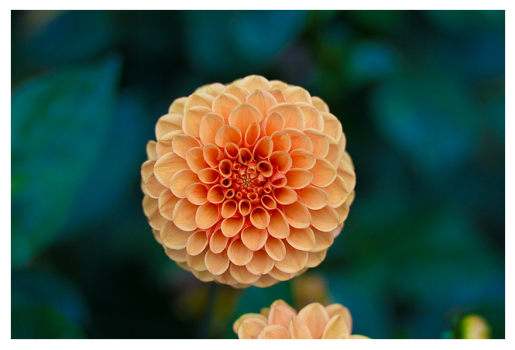

In [ ]:
from sklearn.datasets import load_sample_image
flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);

In [ ]:
flower.shape

(427, 640, 3)

In [ ]:
data = flower / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

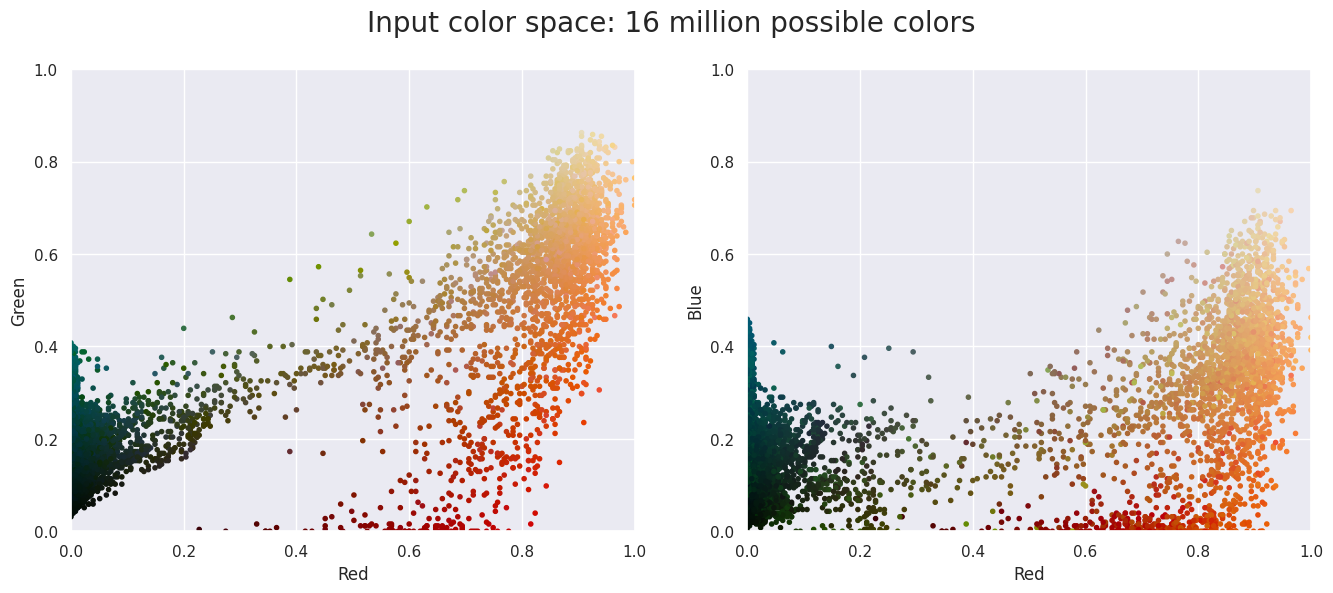

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

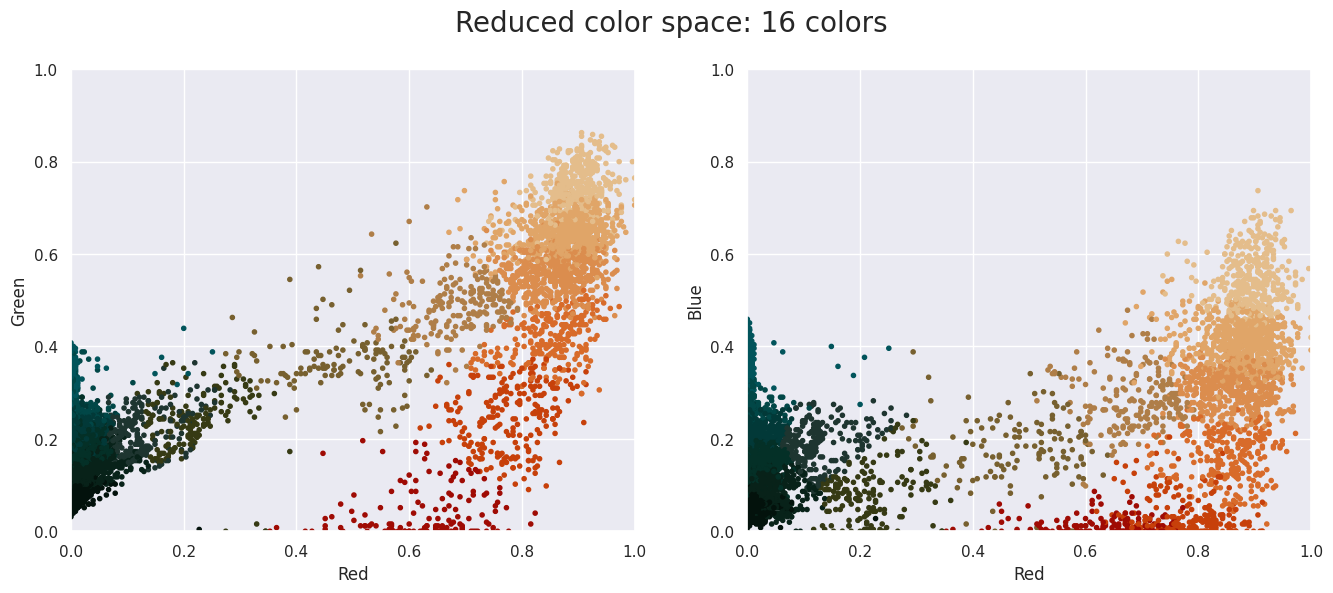

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,title="Reduced color space: 16 colors")

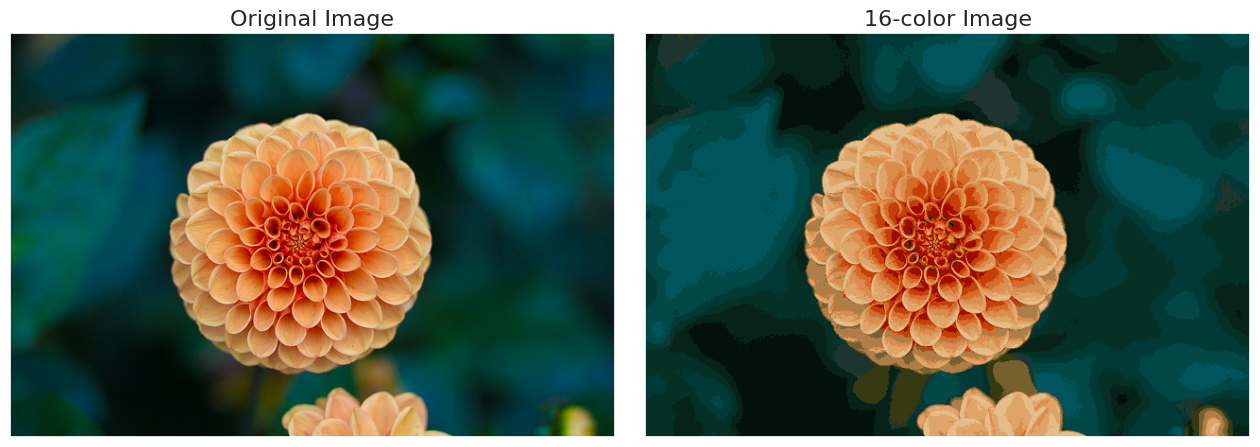

In [ ]:
flower_recolored = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('16-color Image', size=16);

PRAKTIKUM 3

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# buat dataset buatan
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

# scaling data
X = StandardScaler().fit_transform(X)


TUGAS K-MEANS

In [ ]:
# Import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


elbow

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
# Load dataset
df = pd.read_csv("Mall_Customers.csv")

# Pilih fitur untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

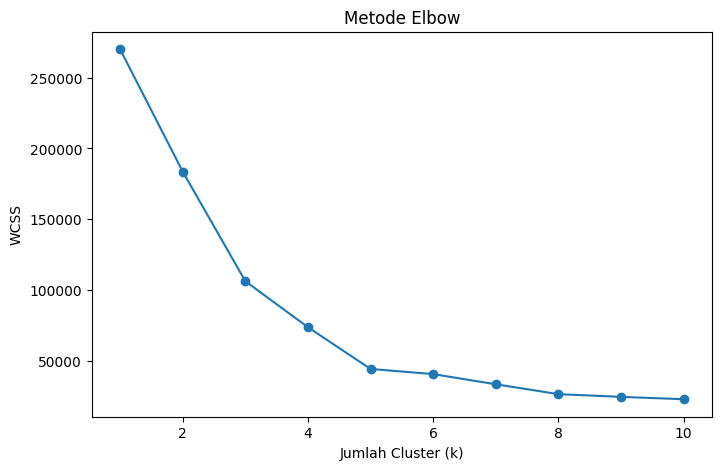

In [ ]:
# -------------------------------
# 1. Menentukan jumlah cluster optimal dengan Elbow Method
# -------------------------------
wcss = []  # Within-Cluster-Sum of Square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot grafik Elbow
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# -------------------------------
# 2. Membuat model KMeans dengan jumlah cluster optimal (misal k=5)
# -------------------------------
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)



In [ ]:
# Tambahkan hasil cluster ke dataframe
df['Cluster'] = y_kmeans

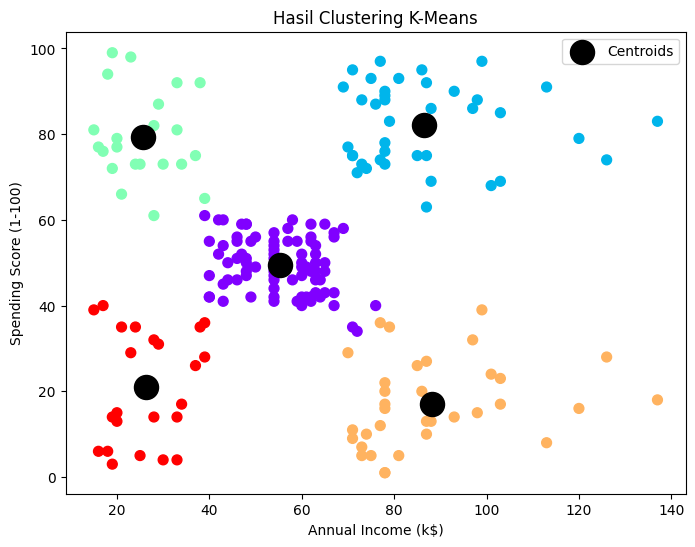

In [ ]:
# -------------------------------
# 3. Visualisasi hasil clustering
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'],
            c=y_kmeans, cmap='rainbow', s=50)

# centroid jadi bulatan hitam
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='black', marker='o', label='Centroids')

plt.title('Hasil Clustering K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


TUGAS DBSCAN

In [ ]:
# Step 1: Import library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

In [ ]:
# Buat dataset make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
# Normalisasi data
X = StandardScaler().fit_transform(X)

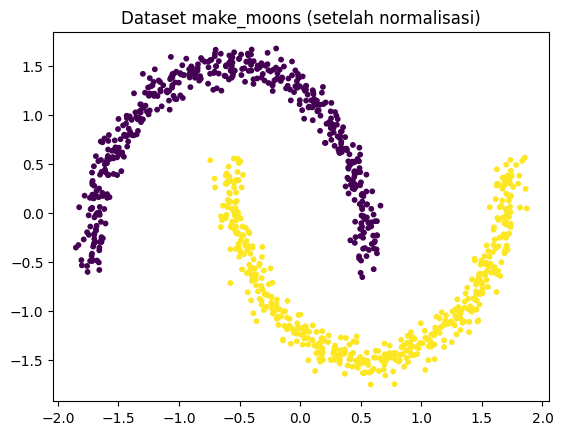

In [ ]:
# Visualisasi dataset awal
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=10)
plt.title("Dataset make_moons (setelah normalisasi)")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Jalankan DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)

In [ ]:
# Ambil label hasil klastering
labels = db.labels_

# Hitung jumlah klaster (label = -1 artinya noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

In [ ]:
print(f"Jumlah klaster: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

Jumlah klaster: 2
Jumlah noise: 0


In [ ]:
from sklearn import metrics

# Evaluasi kualitas klaster
print("Homogeneity:", metrics.homogeneity_score(y, labels))
print("Completeness:", metrics.completeness_score(y, labels))
print("V-measure:", metrics.v_measure_score(y, labels))
print("ARI:", metrics.adjusted_rand_score(y, labels))
print("AMI:", metrics.adjusted_mutual_info_score(y, labels))

# Untuk Silhouette, hanya bisa dihitung jika klaster > 1
if n_clusters > 1:
    print("Silhouette:", metrics.silhouette_score(X, labels))
else:
    print("Silhouette: tidak bisa dihitung (hanya 1 klaster)")

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
ARI: 1.0
AMI: 1.0
Silhouette: 0.3911598537138403


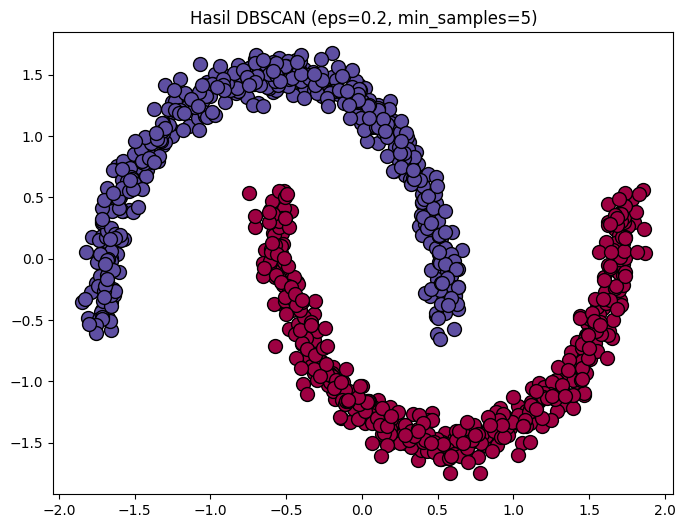

In [ ]:
# Warna berdasarkan klaster
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = warna hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core sample = titik besar
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    # Non-core sample = titik kecil
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=5)

plt.title("Hasil DBSCAN (eps=0.2, min_samples=5)")
plt.show()


In [ ]:
# Daftar parameter untuk eksperimen
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(X)
        labels = db.labels_

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        print("="*50)
        print(f"eps={eps}, min_samples={min_s}")
        print(f"Jumlah klaster: {n_clusters}, Noise: {n_noise}")

        # Evaluasi
        print("Homogeneity:", metrics.homogeneity_score(y, labels))
        print("Completeness:", metrics.completeness_score(y, labels))
        print("V-measure:", metrics.v_measure_score(y, labels))
        print("ARI:", metrics.adjusted_rand_score(y, labels))
        print("AMI:", metrics.adjusted_mutual_info_score(y, labels))
        if n_clusters > 1:
            print("Silhouette:", metrics.silhouette_score(X, labels))
        else:
            print("Silhouette: tidak bisa dihitung")


eps=0.05, min_samples=3
Jumlah klaster: 69, Noise: 186
Homogeneity: 0.8155542882355717
Completeness: 0.15254831024758073
V-measure: 0.25702116445185835
ARI: 0.03004350976613907
AMI: 0.243804587789628
Silhouette: 0.11292949852882253
eps=0.05, min_samples=10
Jumlah klaster: 3, Noise: 970
Homogeneity: 0.030669398254336424
Completeness: 0.126764095870306
V-measure: 0.04938947156339281
ARI: 0.0022825509789741014
AMI: 0.0458636142209481
Silhouette: -0.29419008256642176
eps=0.05, min_samples=20
Jumlah klaster: 0, Noise: 1000
Homogeneity: 0.0
Completeness: 1.0
V-measure: 0.0
ARI: 0.0
AMI: 0.0
Silhouette: tidak bisa dihitung
eps=0.1, min_samples=3
Jumlah klaster: 2, Noise: 14
Homogeneity: 0.9862068060955204
Completeness: 0.9028959083596275
V-measure: 0.9427143195619004
ARI: 0.9721793882692121
AMI: 0.942633562340455
Silhouette: 0.2516903011504368
eps=0.1, min_samples=10
Jumlah klaster: 7, Noise: 57
Homogeneity: 0.9433167874862703
Completeness: 0.4095463775841256
V-measure: 0.571132370522031
ARI: